<a href="https://colab.research.google.com/github/Denerhiguchi/ColabIrisToolkit/blob/main/Iris_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiras linhas do DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
Accuracy: 0.9666666666666667
classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97   

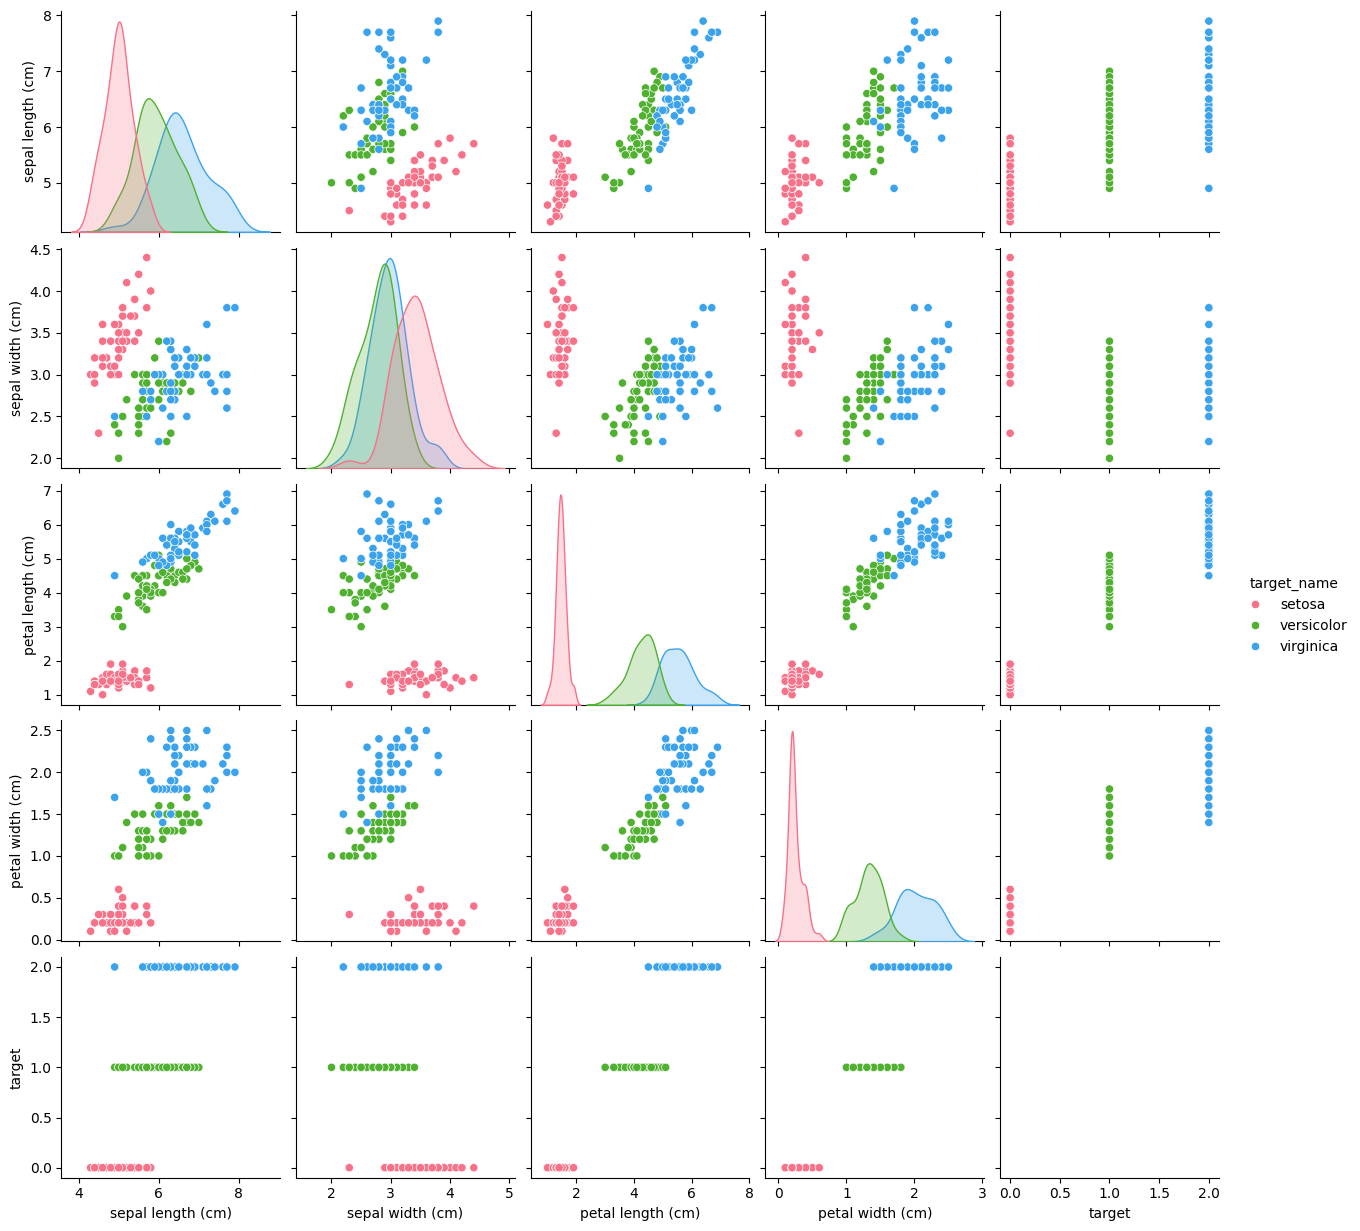

In [ ]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#Carregando o conjunto de dados Iris
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

#Criando um DataFrame parar melhro visualização
df = pd.DataFrame(x, columns=feature_names)
df['target'] = y
df ['target_name'] = df['target'].apply(lambda x: target_names[x])

#Visualizando os dados
print("Primeiras linhas do DataFrame:")
print(df.head())

#Dividindo os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#padronizando os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Treinando o classificador

model =SVC(kernel ='linear',random_state=42)
model.fit(x_train_scaled, y_train)

#fazendo previsões
y_pred = model.predict(x_test_scaled)

#avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("classification Report:")
print(report)

#Visualizando os Resultados

sns.pairplot(df, hue= 'target_name',palette='husl')
plt.show()